# Chapter 3 testrun

Here, I will run explore setting up DOE run-through in Python based on the DOE simplified book, chapter 3.

In [100]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import math

In [72]:
df = pd.read_csv('input_data.csv', index_col=0)
df['time'] = df['time'].astype('category')
df['power'] = df['power'].astype('category')
print(df)

def get_high_low(x, low_category):
    if x == low_category:
        return '-'
    else:
        return '+'

factor_df = pd.DataFrame(index=df.index)
factor_df['y1'] = df['taste']
factor_df['y2'] = df['bullets']
factor_df['A'] = df['brand'].apply(get_high_low, args=('cheap',))
factor_df['B'] = df['time'].apply(get_high_low, args=(4,))
factor_df['C'] = df['power'].apply(get_high_low, args=(75,))

def calculate_interaction(data_df, cols):
    slices = data_df[cols].apply(tuple, axis=1)
    
    interaction = list()
    for tup in slices:
        int_tup = reduce(lambda a,b: '+' if a == b else '-', tup)
        interaction.append(int_tup)
    return interaction

factor_df['AB'] = calculate_interaction(factor_df, ['A', 'B'])
factor_df['AC'] = calculate_interaction(factor_df, ['A', 'C'])
factor_df['BC'] = calculate_interaction(factor_df, ['B', 'C'])
factor_df['ABC'] = calculate_interaction(factor_df, ['A', 'B', 'C'])

print(factor_df)

      brand time power  taste  bullets
run                                   
1    costly    4    75     75      3.5
2     cheap    6    75     71      1.6
3     cheap    4   100     81      0.7
4    costly    6    75     80      1.2
5    costly    4   100     77      0.7
6    costly    6   100     32      0.3
7     cheap    6   100     42      0.5
8     cheap    4    75     74      3.1
     y1   y2  A  B  C AB AC BC ABC
run                               
1    75  3.5  +  -  -  -  -  +   +
2    71  1.6  -  +  -  -  +  -   +
3    81  0.7  -  -  +  +  -  -   +
4    80  1.2  +  +  -  +  -  -   -
5    77  0.7  +  -  +  -  +  -   -
6    32  0.3  +  +  +  +  +  +   +
7    42  0.5  -  +  +  -  -  +   -
8    74  3.1  -  -  -  +  +  +   -


In [74]:
factor_effects = pd.DataFrame(columns=['A', 'B', 'C', 'AB', 'BC', 'AC', 'ABC'], index=['y1', 'y2'])

def get_factor_effect(factor_col, effect_col, data_df):
    
    combined = zip(data_df[factor_col], data_df[effect_col])
    summed = 0
    for elem in combined:
        level = elem[0]
        value = elem[1]
        if level == '+':
            summed += value
        else:
            summed -= value
    return summed

for factor in factor_effects.columns:
    for effect in factor_effects.index:
        factor_effects.ix[effect, factor] = get_factor_effect(factor, effect, factor_df) / 4

print(factor_effects)

       A     B    C    AB    BC    AC   ABC
y1    -1 -20.5  -17   0.5 -21.5    -6  -3.5
y2 -0.05  -1.1 -1.8 -0.25   0.8 -0.05  0.15


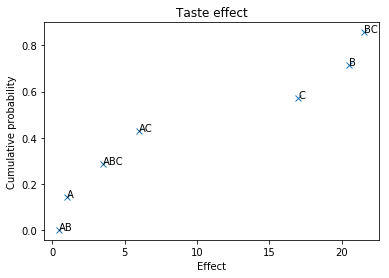

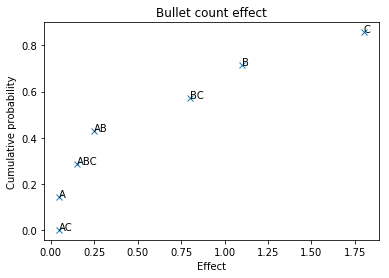

In [122]:
y1_abs_effect = factor_effects.loc['y1'].map(abs).sort_values()
y2_abs_effect = factor_effects.loc['y2'].map(abs).sort_values()

def add_labels(plt, effect, prob):
    for i in range(len(effect)):
        plt.annotate(effect.index[i],
                     xy = (effect[i], prob[i]))    

def annotate(plt, title):
    
    plt.xlabel('Effect')
    plt.ylabel('Cumulative probability')
    plt.title(title)
        
plt.figure()
cum_prob = np.arange(0, 1, 1 / len(y1_abs_effect))
plt.plot(y1_abs_effect, cum_prob, 'x')
add_labels(plt, y1_abs_effect, cum_prob)
annotate(plt, 'Taste effect')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / len(y2_abs_effect))
plt.plot(y2_abs_effect, cum_prob, 'x')
add_labels(plt, y2_abs_effect, cum_prob)
annotate(plt, 'Bullet count effect')
plt.show()


# Getting into the statistics

Reference:
* A - Brand
* B - Time
* C - Power
* y1 - Taste
* y2 - Bullets

Steps below initially based on: http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

In [136]:
print(df)

      brand time power  taste  bullets
run                                   
1    costly    4    75     75      3.5
2     cheap    6    75     71      1.6
3     cheap    4   100     81      0.7
4    costly    6    75     80      1.2
5    costly    4   100     77      0.7
6    costly    6   100     32      0.3
7     cheap    6   100     42      0.5
8     cheap    4    75     74      3.1


In [134]:
print(factor_df)

     y1   y2  A  B  C AB AC BC ABC
run                               
1    75  3.5  +  -  -  -  -  +   +
2    71  1.6  -  +  -  -  +  -   +
3    81  0.7  -  -  +  +  -  -   +
4    80  1.2  +  +  -  +  -  -   -
5    77  0.7  +  -  +  -  +  -   -
6    32  0.3  +  +  +  +  +  +   +
7    42  0.5  -  +  +  -  -  +   -
8    74  3.1  -  -  -  +  +  +   -


In [128]:
# Let's use some more statistics-related packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

In [191]:
# Working tooth example

# data = pd.read_csv('ToothGrowth.csv')
# dose_series = data['dose']
# print(dose_series.head())
# print(data.head())
# print(df.head())

# plt.figure()
# fig = interaction_plot(dose_series, data.supp, data.len,
#              colors=['red','blue'], markers=['D','^'], ms=10)
# plt.show()

Not satisfied here :\ Different from book, but why?


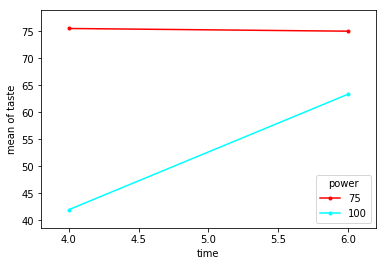

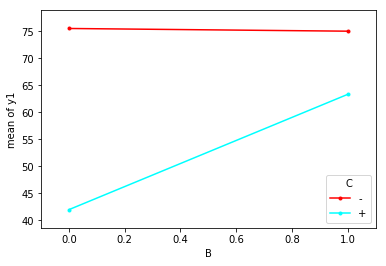

In [193]:
print('Not satisfied here :\ Different from book, but why?')

time_series = df['time'].astype('float')
time_series.index = list(range(0,8))
fig1 = interaction_plot(time_series, df['power'], df['taste'])
# plt.show()

b_series = factor_df['B'].map(lambda x: 0 if x == '-' else 1).astype('float')
b_series.index = list(range(0,8))
# print(b_series)
fig2 = interaction_plot(b_series, factor_df['C'], factor_df['y1'])
plt.show()

# UPCOMING: ANOVAS AND PREDICTION